<a href="https://colab.research.google.com/github/aser-tesfaye/Image_Classification_with_CNN/blob/main/Image_classification_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

#### # Display the labels of the first five images in the training set

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# Flatten the train labels array to a 1D array
y_train = y_train.reshape(-1,)

# Display the first five labels
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
# Flatten the test labels array to a 1D array
y_test = y_test.reshape(-1,)

In [ ]:
# Define the class labels
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
# function to plot a sample image and its label

def plot_sample(X, y, index):

    # Set the figure size to (15,2) inches
    plt.figure(figsize = (15,2))

    # Display the image at the specified index
    plt.imshow(X[index])

    # Set the x-label to the corresponding class label
    plt.xlabel(classes[y[index]])

The function `plot_sample` takes three arguments:

`X`: This is your image data.

`y`: This contains the labels for your images.

`index`: This is the index of the specific image you want to plot.

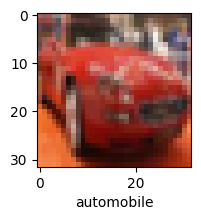

In [ ]:
plot_sample(X_train, y_train, 5)

In [ ]:
# Normalize pixel values to be between 0 and 1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
# Define the Convolutional Neural Network (CNN) model

cnn = models.Sequential([

    # Convolutional layers

    # First convolutional layer with 32 filters, a 2x2 kernel, ReLU activation, and input shape matching CIFAR-10 images
    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(32, 32, 3)),

    # Max pooling layer with a 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters and a 2x2 kernel
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),

    # Another max pooling layer
    layers.MaxPooling2D((2, 2)),


    # Dense layers

    # Flatten the output from convolutional layers to feed into dense layers
    layers.Flatten(),

    # Dense layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Output layer with 10 units (for 10 classes) and softmax activation for classification
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the CNN model

cnn.compile(optimizer='adam',    #Adam optimizer for updating model weights
              loss='sparse_categorical_crossentropy',      # for multi-class classification with integer labels
              metrics=['accuracy'])     # Tracking the accuracy as a metric during training

####An epoch means training the neural network with all the training data for one cycle

In [ ]:
# Train the CNN model

cnn.fit(X_train, y_train, epochs=15)
#An epoch means training the neural network with all the training data for one cycle

Epoch 1/15
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5112 - accuracy: 0.4575
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1845 - accuracy: 0.5816
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0597 - accuracy: 0.6294
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9653 - accuracy: 0.6633
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8983 - accuracy: 0.6887
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8471 - accuracy: 0.7072
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8043 - accuracy: 0.7204
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7691 - accuracy: 0.7321
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7325 - accuracy: 0.7451
Epoch 10/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.700

In [ ]:
# Evaluate the model on the test set

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9739 - accuracy: 0.6947


[0.9738836884498596, 0.6947000026702881]

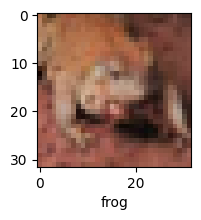

In [ ]:
# Display the image at index 5 from the test set along with its label
plot_sample(X_test, y_test,5)

In [ ]:
# Generate predictions for the test set
y_pred = cnn.predict(X_test)

# Display the first 5 predictions
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.16081215e-01, 2.49740860e-05, 4.77839676e-05, 7.65169740e-01,
        7.57558428e-06, 3.82031575e-02, 8.68788193e-05, 3.59448895e-05,
        8.03343579e-02, 8.43470843e-06],
       [4.68489918e-04, 1.00813679e-01, 2.44390918e-07, 5.38009317e-06,
        2.11863966e-08, 4.88409285e-07, 7.68536594e-08, 5.04608932e-09,
        8.98667693e-01, 4.39431169e-05],
       [8.78706515e-01, 1.08593600e-02, 1.42231099e-02, 3.09740519e-03,
        5.25372569e-03, 5.50023069e-05, 8.21471040e-05, 9.58859455e-03,
        7.36057907e-02, 4.52833204e-03],
       [9.49091434e-01, 4.52979207e-02, 3.03595243e-05, 3.48883418e-06,
        2.38643610e-04, 3.61632442e-06, 2.87470152e-06, 4.95057429e-05,
        5.15510095e-03, 1.27060848e-04],
       [1.81242899e-06, 1.39079361e-06, 1.42918108e-03, 9.00711492e-02,
        2.94853598e-01, 2.95242132e-03, 6.10491753e-01, 5.10693053e-06,
        1.91423169e-04, 2.14750480e-06]], dtype=float32)

In [ ]:
# Extract the predicted class labels from the predicted probabilities
y_classes = [np.argmax(element) for element in y_pred]

# Display the first 5 predicted class labels
y_classes[:5]

[3, 8, 0, 0, 6]

In [ ]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

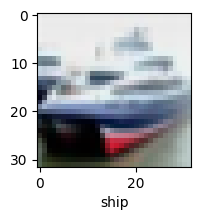

In [ ]:
plot_sample(X_test, y_test,1)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5397 - accuracy: 0.8132 - val_loss: 0.9922 - val_accuracy: 0.6937
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5204 - accuracy: 0.8167 - val_loss: 0.9806 - val_accuracy: 0.6960
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4998 - accuracy: 0.8237 - val_loss: 1.0126 - val_accuracy: 0.6905
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4751 - accuracy: 0.8338 - val_loss: 1.0431 - val_accuracy: 0.6959
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4551 - accuracy: 0.8391 - val_loss: 1.0704 - val_accuracy: 0.6851
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4375 - accuracy: 0.8467 - val_loss: 1.0901 - val_accuracy: 0.6935
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4204 - accuracy: 0.8523 - val_loss: 1.1564 - val_accuracy:

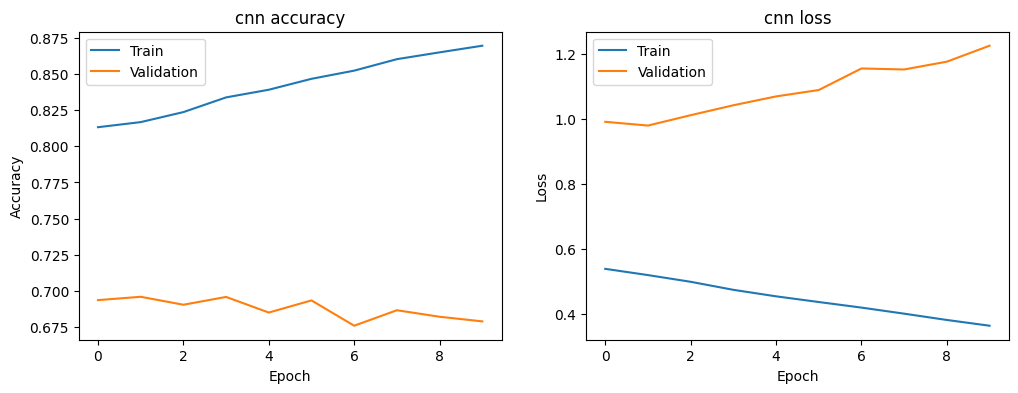

In [ ]:
# Assuming 'history' is the output from cnn.fit()
history = cnn.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


1/1 [==============================] - 0s 45ms/step


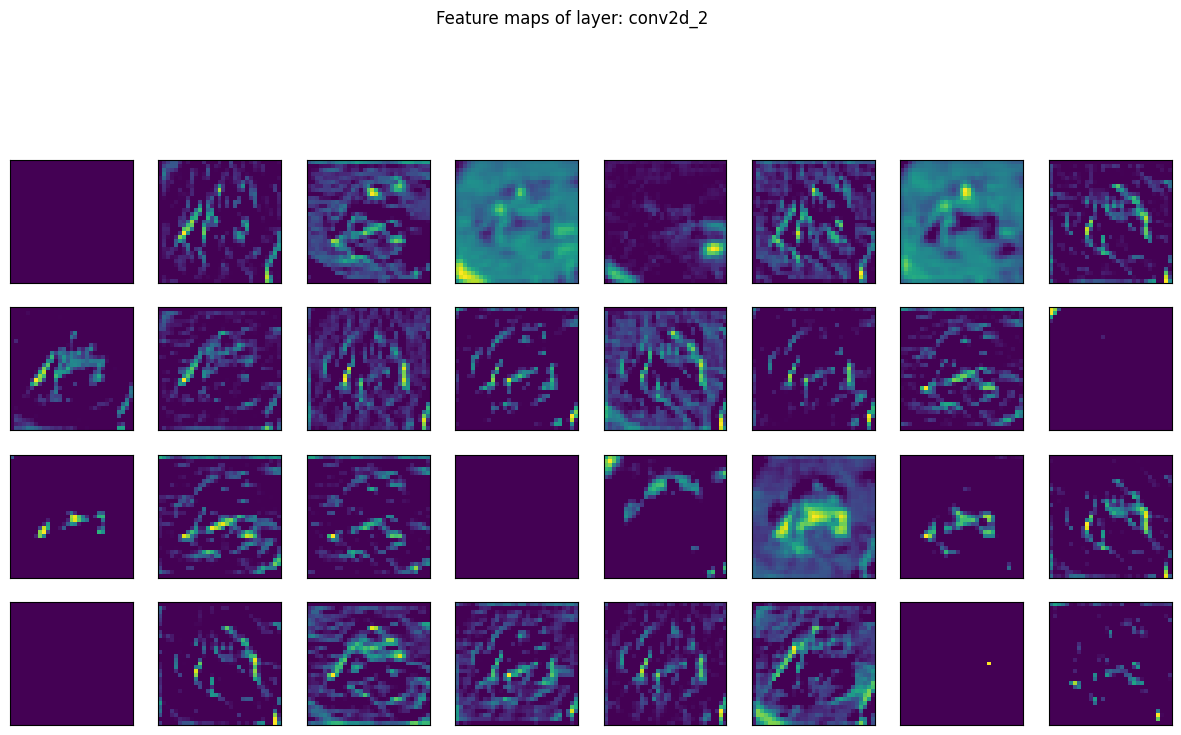

In [ ]:
from tensorflow.keras.models import Model

# Get the output of the first convolutional layer
layer_outputs = [layer.output for layer in cnn.layers if 'conv' in layer.name]
activation_model = Model(inputs=cnn.input, outputs=layer_outputs)

# Choose an image to pass through the model
img = train_images[0]
img = np.expand_dims(img, axis=0)

# Get the feature maps
feature_maps = activation_model.predict(img)

# Plot the feature maps for the first convolutional layer
first_layer_activation = feature_maps[0]
layer_name = cnn.layers[0].name

plt.figure(figsize=(15, 15))
for i in range(first_layer_activation.shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
plt.suptitle(f'Feature maps of layer: {layer_name}')
plt.show()



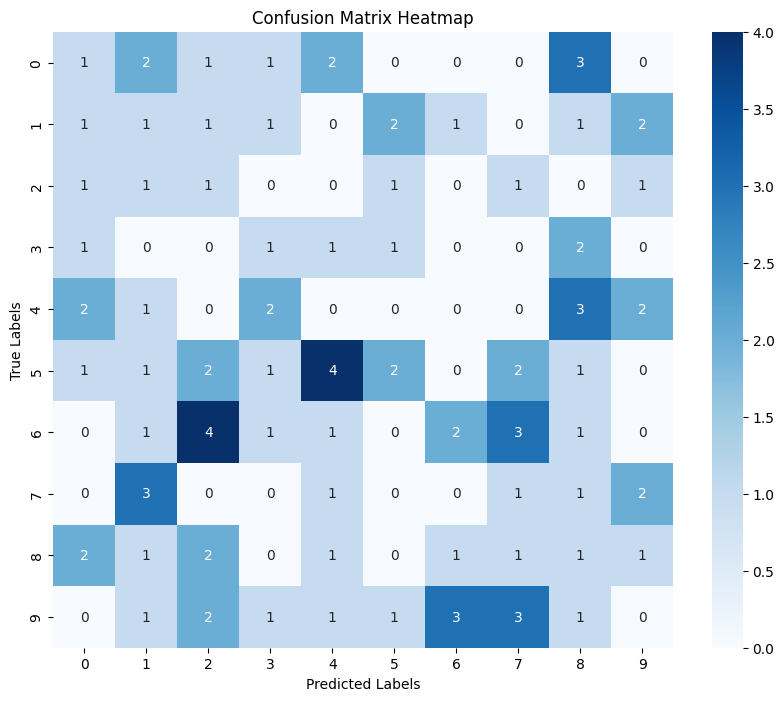

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dummy true labels and predicted labels for demonstration purposes
true_labels = np.random.randint(0, 10, size=100)  # Assuming 10 classes
predicted_labels = np.random.randint(0, 10, size=100)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
# Save the entire model to a HDF5 file
cnn.save("my_model.h5")

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model("my_model.h5")

In [ ]:
# Assuming 'X_test' and 'y_test' are your test data and labels
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.2264 - accuracy: 0.6790
Loss: 1.2264090776443481
Accuracy: 0.6790000200271606
